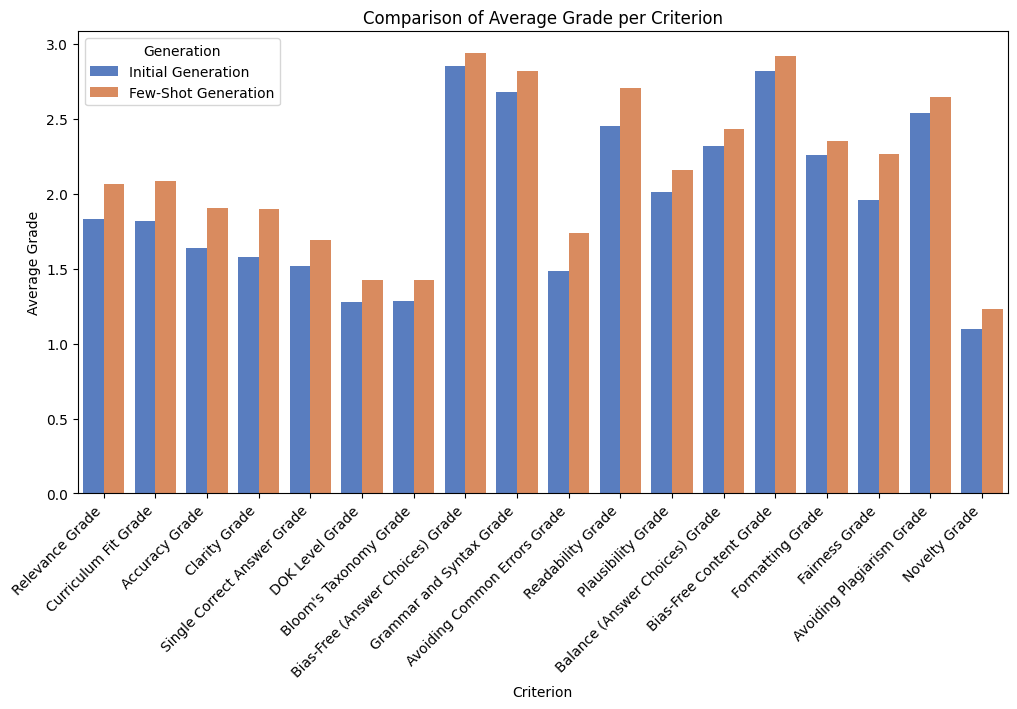

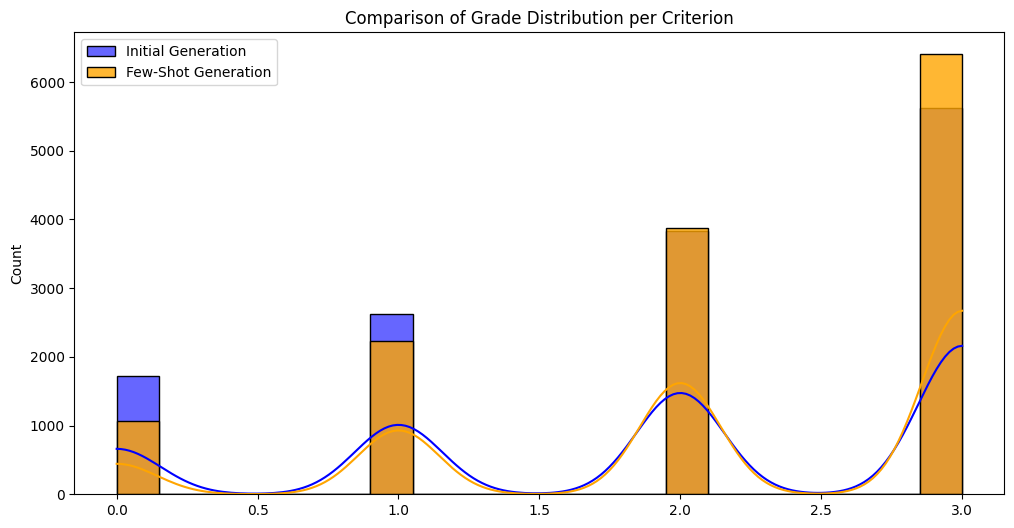

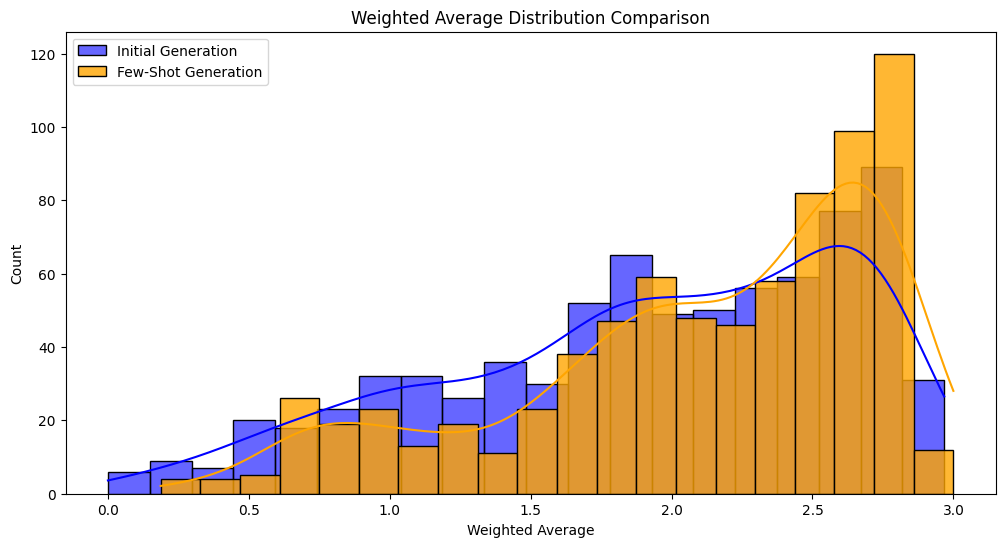

C:\Users\amjad\AppData\Local\Temp\ipykernel_36516\3452091568.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\amjad\AppData\Local\Temp\ipykernel_36516\3452091568.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


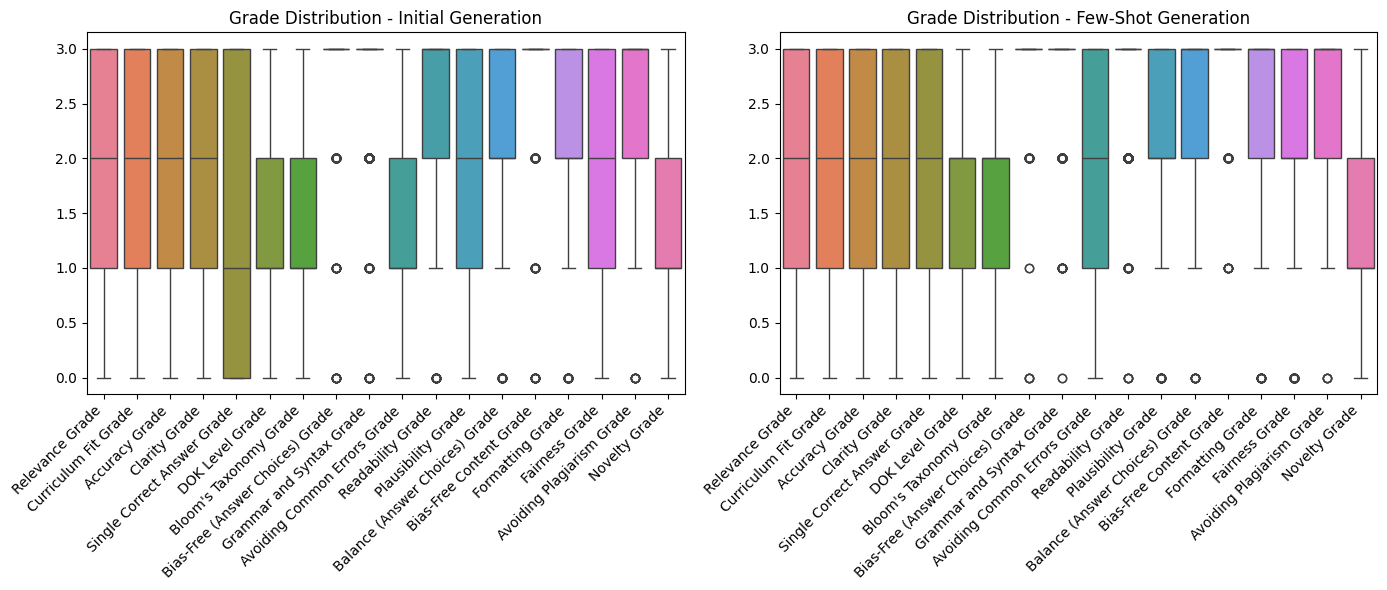

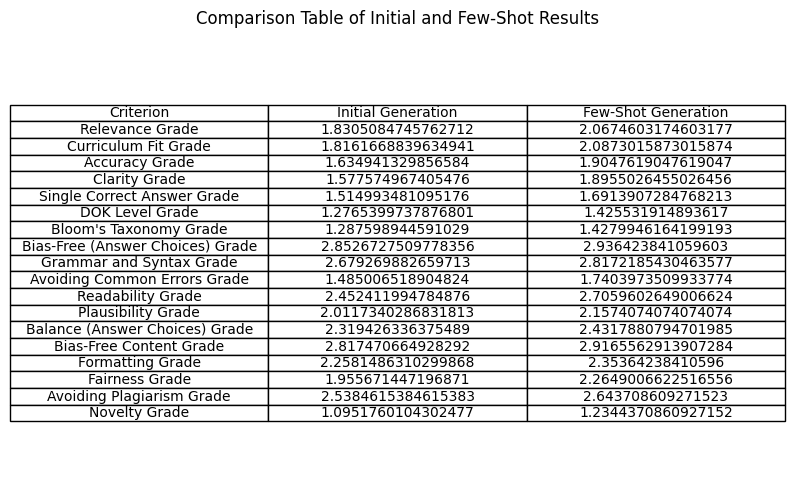

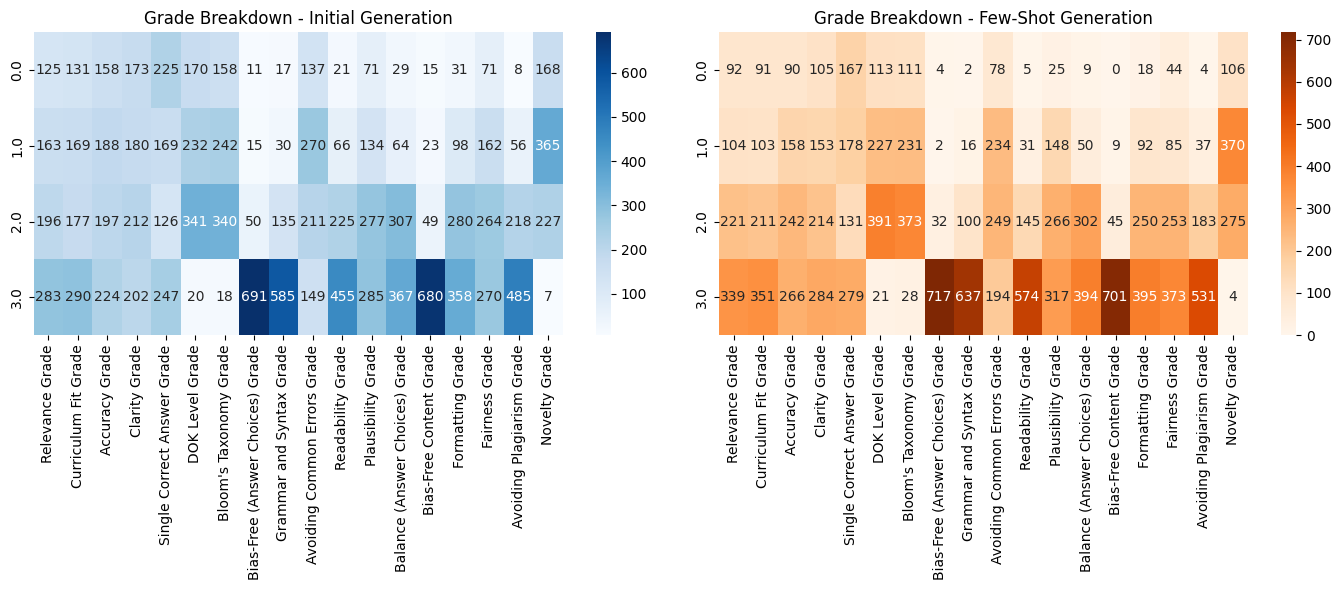

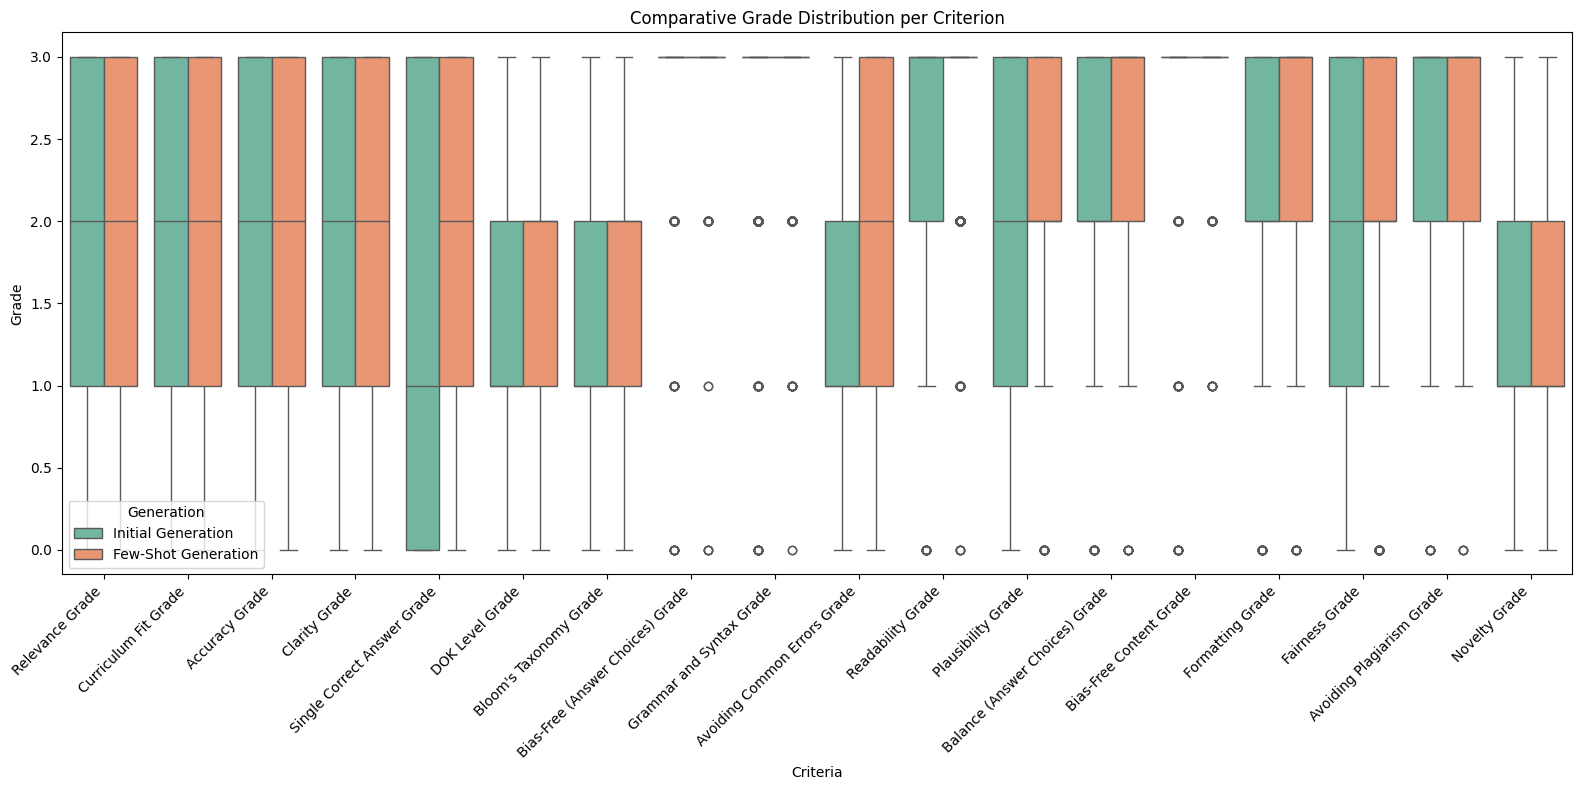

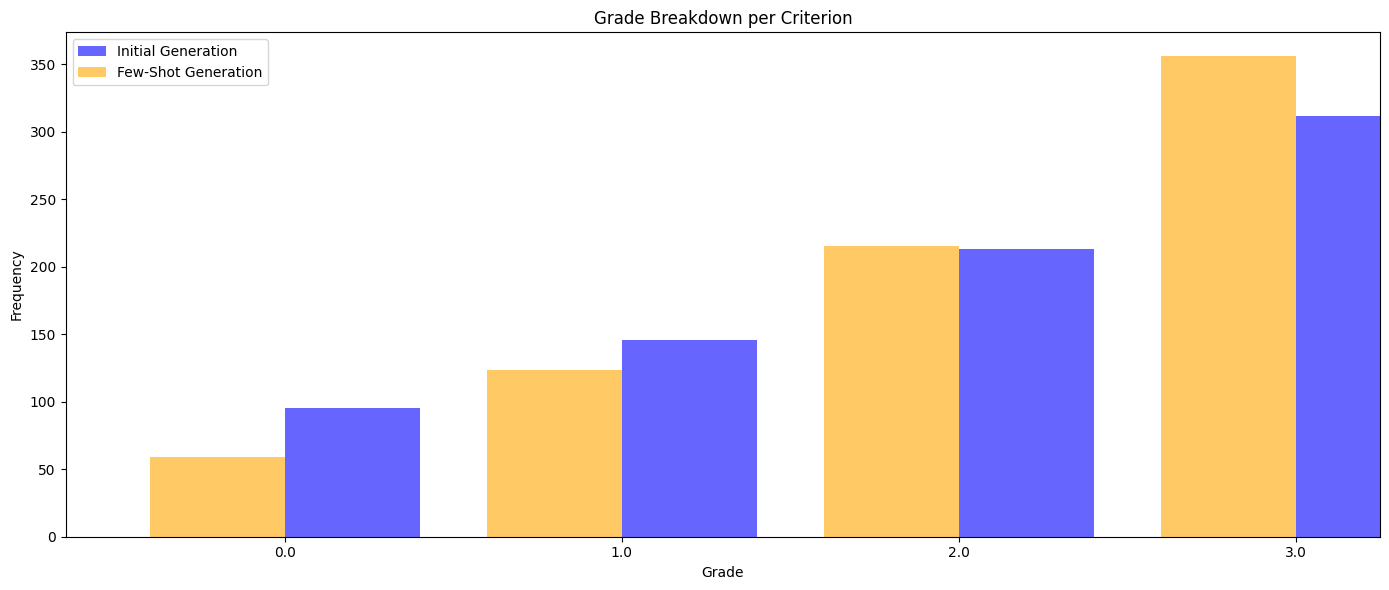

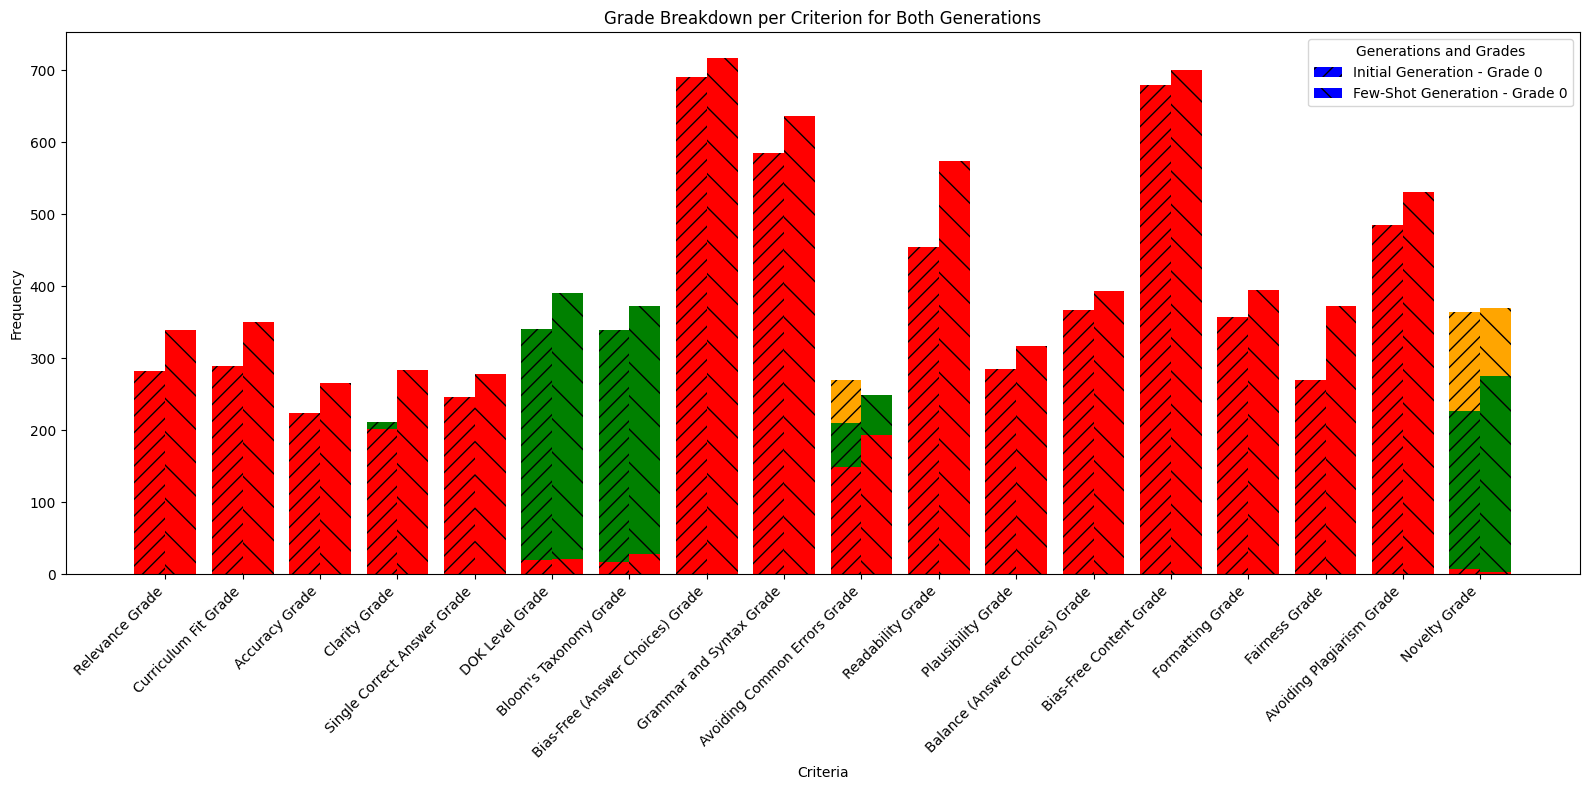

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load initial generation data
file_path_initial = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_FULL.xlsx'
df_initial = pd.read_excel(file_path_initial)

# Load few-shot generation data
file_path_few_shot = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_few_shot.xlsx'
df_few_shot = pd.read_excel(file_path_few_shot)

# Count initial number of rows
initial_row_count_initial = len(df_initial)
initial_row_count_few_shot = len(df_few_shot)

# Drop rows where both 'Question' and 'Choices' are NaN
df_initial = df_initial.dropna(subset=['Question', 'Choices'], how='all')
df_few_shot = df_few_shot.dropna(subset=['Question', 'Choices'], how='all')

# Count the number of rows dropped
dropped_count_initial = initial_row_count_initial - len(df_initial)
dropped_count_few_shot = initial_row_count_few_shot - len(df_few_shot)

# Define weights for each criterion
weights = {
    'Relevance Grade': 5.0,
    'Curriculum Fit Grade': 5.0,
    'Accuracy Grade': 5.0,
    'Clarity Grade': 5.0,
    'Single Correct Answer Grade': 5.0,
    'DOK Level Grade': 3.5,
    "Bloom's Taxonomy Grade": 3.5,
    'Bias-Free (Answer Choices) Grade': 2.5,
    'Grammar and Syntax Grade': 3.5,
    'Avoiding Common Errors Grade': 2.5,
    'Readability Grade': 3.5,
    'Plausibility Grade': 3.0,
    'Balance (Answer Choices) Grade': 2.5,
    'Bias-Free Content Grade': 2.5,
    'Formatting Grade': 3.0,
    'Fairness Grade': 2.5,
    'Avoiding Plagiarism Grade': 2.0,
    'Novelty Grade': 2.0
}

# Normalize weights so they sum to 1
total_weight = sum(weights.values())
weights = {k: v / total_weight for k, v in weights.items()}

# Identify critical criteria
critical_criteria = ['Relevance Grade', 'Accuracy Grade', 'Single Correct Answer Grade', 'Clarity Grade']

# Compute weighted average for both datasets
def compute_weighted_average(df):
    return df[weights.keys()].mul(weights).sum(axis=1)

df_initial['Weighted Average'] = compute_weighted_average(df_initial)
df_few_shot['Weighted Average'] = compute_weighted_average(df_few_shot)

# Determine passing questions
def determine_passing(df):
    return (~df[critical_criteria].lt(1).any(axis=1)) & (df['Weighted Average'] >= 1)

df_initial['Passed'] = determine_passing(df_initial)
df_few_shot['Passed'] = determine_passing(df_few_shot)

# 📊 Visualization 1: Overlayed Bar Chart - Average Grade per Criterion
plt.figure(figsize=(12, 6))
average_grades_df = pd.DataFrame({
    'Criterion': list(weights.keys()),
    'Initial Generation': df_initial[weights.keys()].mean(),
    'Few-Shot Generation': df_few_shot[weights.keys()].mean()
})
sns.barplot(data=average_grades_df.melt(id_vars='Criterion', var_name='Generation', value_name='Average Grade'), 
            x='Criterion', y='Average Grade', hue='Generation', palette="muted")
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Average Grade per Criterion')
plt.show()

# 📊 Visualization 2: Stacked Histogram - Grade Distribution per Criterion
plt.figure(figsize=(12, 6))
sns.histplot(df_initial[weights.keys()].stack(), bins=20, kde=True, label='Initial Generation', color='blue', alpha=0.6)
sns.histplot(df_few_shot[weights.keys()].stack(), bins=20, kde=True, label='Few-Shot Generation', color='orange', alpha=0.8)
plt.title('Comparison of Grade Distribution per Criterion')
plt.legend()
plt.show()

# 📊 Visualization 3: Weighted Average Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_initial['Weighted Average'], kde=True, bins=20, color='blue', label='Initial Generation', alpha=0.6)
sns.histplot(df_few_shot['Weighted Average'], kde=True, bins=20, color='orange', label='Few-Shot Generation', alpha=0.8)
plt.title('Weighted Average Distribution Comparison')
plt.legend()
plt.show()

# 📊 Visualization 4: Passing vs Failing Questions Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df_initial[weights.keys()], ax=axes[0])
axes[0].set_title("Grade Distribution - Initial Generation")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df_few_shot[weights.keys()], ax=axes[1])
axes[1].set_title("Grade Distribution - Few-Shot Generation")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 📊 Visualization 5: Table of Results
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = average_grades_df.values.tolist()
table_columns = average_grades_df.columns.tolist()
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title('Comparison Table of Initial and Few-Shot Results')
plt.show()

# 📊 Visualization 6: Grade Breakdown per Criterion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
df_initial_counts = df_initial[weights.keys()].apply(pd.Series.value_counts).fillna(0)
df_few_shot_counts = df_few_shot[weights.keys()].apply(pd.Series.value_counts).fillna(0)

sns.heatmap(df_initial_counts, cmap='Blues', annot=True, fmt='.0f', ax=axes[0])
axes[0].set_title("Grade Breakdown - Initial Generation")

sns.heatmap(df_few_shot_counts, cmap='Oranges', annot=True, fmt='.0f', ax=axes[1])
axes[1].set_title("Grade Breakdown - Few-Shot Generation")

plt.tight_layout()
plt.show()

# 📊 Visualization 7: Box Plot - Comparative Grade Distribution per Criterion
plt.figure(figsize=(16, 8))
df_initial_melted = df_initial[weights.keys()].reset_index().melt(id_vars=['index'], var_name='Criterion', value_name='Grade')
df_initial_melted['Generation'] = 'Initial Generation'

df_few_shot_melted = df_few_shot[weights.keys()].reset_index().melt(id_vars=['index'], var_name='Criterion', value_name='Grade')
df_few_shot_melted['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_melted, df_few_shot_melted], ignore_index=True)

sns.boxplot(data=df_combined, x='Criterion', y='Grade', hue='Generation', palette='Set2')
plt.title("Comparative Grade Distribution per Criterion")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Criteria")
plt.ylabel("Grade")
plt.legend(title="Generation", loc='lower left')
plt.tight_layout()
plt.show()

# 📊 Visualization 8: Grade Breakdown per Criterion as Bar Graph
fig, ax = plt.subplots(figsize=(14, 6))
df_initial_counts = df_initial[weights.keys()].apply(pd.Series.value_counts).fillna(0)
df_few_shot_counts = df_few_shot[weights.keys()].apply(pd.Series.value_counts).fillna(0)

df_initial_counts.mean(axis=1).plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4, label='Initial Generation', ax=ax)
df_few_shot_counts.mean(axis=1).plot(kind='bar', color='orange', alpha=0.6, position=1, width=0.4, label='Few-Shot Generation', ax=ax)

ax.set_title("Grade Breakdown per Criterion")
ax.set_xlabel("Grade")
ax.set_ylabel("Frequency")
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 📊 Visualization 9: Grade Breakdown per Criterion as Stacked Bar Graph
# Compute grade counts for each criterion
df_initial_counts = df_initial[weights.keys()].apply(pd.Series.value_counts).fillna(0)
df_few_shot_counts = df_few_shot[weights.keys()].apply(pd.Series.value_counts).fillna(0)

# Reshape the data for visualization
df_initial_counts = df_initial_counts.stack().reset_index()
df_few_shot_counts = df_few_shot_counts.stack().reset_index()
df_initial_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_few_shot_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_initial_counts['Generation'] = 'Initial Generation'
df_few_shot_counts['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_counts, df_few_shot_counts])

# Assign hatching patterns for the two generations
hatch_patterns = {"Initial Generation": "//", "Few-Shot Generation": "\\"}
colors = {0: "blue", 1: "orange", 2: "green", 3: "red"}  # Assign colors for grades

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.4  # Width of each bar
x = np.arange(len(weights.keys()))  # X-axis positions

# Plot bars for each grade
for grade in [0, 1, 2, 3]:
    for i, generation in enumerate(["Initial Generation", "Few-Shot Generation"]):
        subset = df_combined[(df_combined['Grade'] == grade) & (df_combined['Generation'] == generation)]
        ax.bar(x + (i - 0.5) * bar_width, subset['Frequency'], width=bar_width, label=f"{generation} - Grade {grade}" if grade == 0 else "", color=colors[grade], hatch=hatch_patterns[generation])

ax.set_xticks(x)
ax.set_xticklabels(weights.keys(), rotation=45, ha='right')
ax.set_title("Grade Breakdown per Criterion for Both Generations")
ax.set_xlabel("Criteria")
ax.set_ylabel("Frequency")
ax.legend(title="Generations and Grades")
plt.tight_layout()
plt.show()


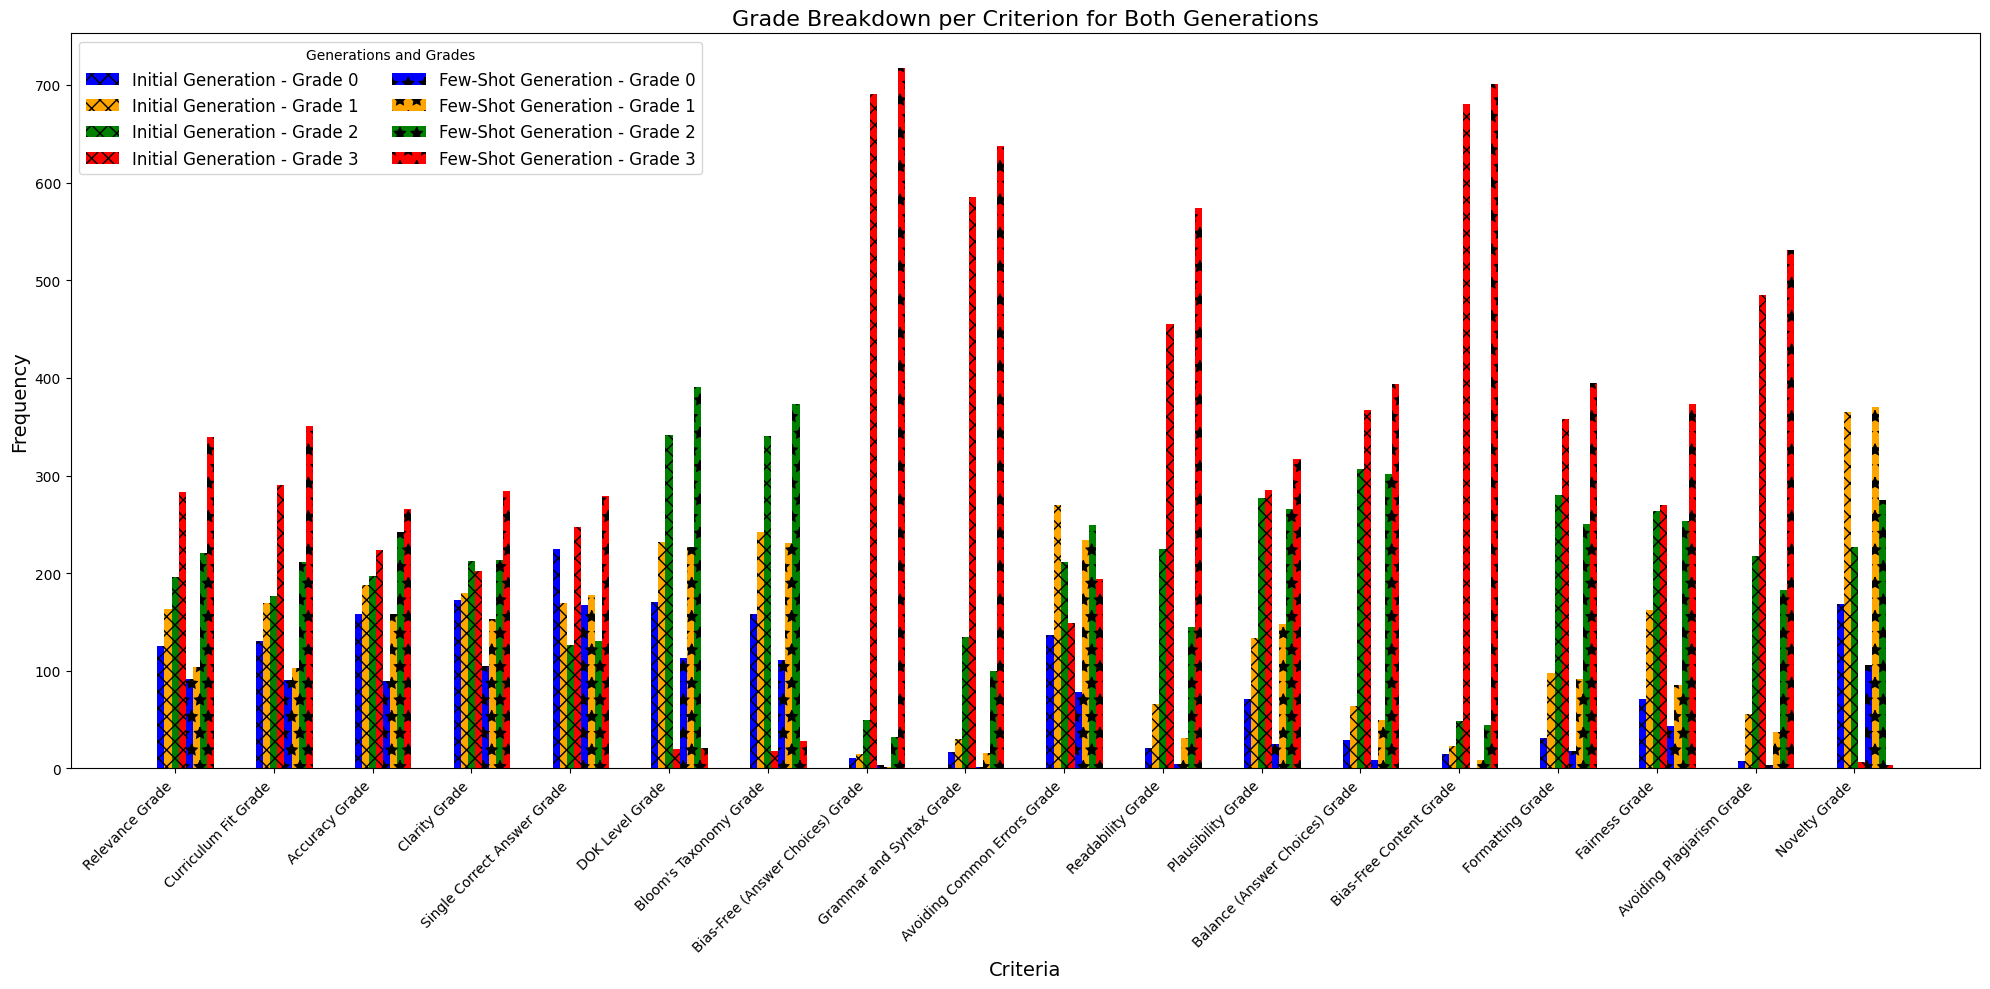

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load initial generation data
file_path_initial = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_FULL.xlsx'
df_initial = pd.read_excel(file_path_initial)

# Load few-shot generation data
file_path_few_shot = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_few_shot.xlsx'
df_few_shot = pd.read_excel(file_path_few_shot)

# Drop rows where both 'Question' and 'Choices' are NaN
df_initial = df_initial.dropna(subset=['Question', 'Choices'], how='all')
df_few_shot = df_few_shot.dropna(subset=['Question', 'Choices'], how='all')

# Define weights for each criterion
weights = {
    'Relevance Grade': 5.0,
    'Curriculum Fit Grade': 5.0,
    'Accuracy Grade': 5.0,
    'Clarity Grade': 5.0,
    'Single Correct Answer Grade': 5.0,
    'DOK Level Grade': 3.5,
    "Bloom's Taxonomy Grade": 3.5,
    'Bias-Free (Answer Choices) Grade': 2.5,
    'Grammar and Syntax Grade': 3.5,
    'Avoiding Common Errors Grade': 2.5,
    'Readability Grade': 3.5,
    'Plausibility Grade': 3.0,
    'Balance (Answer Choices) Grade': 2.5,
    'Bias-Free Content Grade': 2.5,
    'Formatting Grade': 3.0,
    'Fairness Grade': 2.5,
    'Avoiding Plagiarism Grade': 2.0,
    'Novelty Grade': 2.0
}

# Compute grade counts for each criterion
df_initial_counts = df_initial[weights.keys()].apply(pd.Series.value_counts).fillna(0)
df_few_shot_counts = df_few_shot[weights.keys()].apply(pd.Series.value_counts).fillna(0)

# Reshape the data for visualization
df_initial_counts = df_initial_counts.stack().reset_index()
df_few_shot_counts = df_few_shot_counts.stack().reset_index()
df_initial_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_few_shot_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_initial_counts['Generation'] = 'Initial Generation'
df_few_shot_counts['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_counts, df_few_shot_counts])

# Assign hatching patterns for the two generations
hatch_patterns = {"Initial Generation": "xx", "Few-Shot Generation": "*"}
colors = {0: "blue", 1: "orange", 2: "green", 3: "red"}  # Assign colors for grades

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(20, 10))  # Increase figure size
bar_width = 0.15  # Reduce bar width to avoid overlap
spacing_between_groups = 1.5  # Increase spacing between different criteria
x = np.arange(len(weights.keys())) * (4 * bar_width + spacing_between_groups)  # Increase spacing between groups

# Store legend handles for all elements
legend_handles = []
legend_labels = []

# Plot bars for each grade
for i, generation in enumerate(["Initial Generation", "Few-Shot Generation"]):
    for j, grade in enumerate([0, 1, 2, 3]):
        subset = df_combined[(df_combined['Grade'] == grade) & (df_combined['Generation'] == generation)]
        bars = ax.bar(x + i * (4 * bar_width) + j * bar_width, subset['Frequency'], width=bar_width,
                      color=colors[grade], hatch=hatch_patterns[generation])
        
        # Store the first instance of each legend entry
        if (generation, grade) not in legend_labels:
            legend_handles.append(bars[0])
            legend_labels.append(f"{generation} - Grade {grade}")

ax.set_xticks(x + (2 * bar_width))
ax.set_xticklabels(weights.keys(), rotation=45, ha='right')
ax.set_title("Grade Breakdown per Criterion for Both Generations", fontsize=16)
ax.set_xlabel("Criteria", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Update legend to include both generations and all grades
ax.legend(legend_handles, legend_labels, title="Generations and Grades", bbox_to_anchor=(0, 1), loc='upper left', fontsize=12, ncol=2)

plt.tight_layout()
plt.show()

               Dataset  Imputed Rows  Final Rows  \
0   Initial Generation             9         767   
1  Few-Shot Generation            13         767   

   Failed Due to Critical Criteria  Passing Questions  Failing Questions  
0                              304                463                304  
1                              217                550                217  
                           Criterion  Initial Generation  Few-Shot Generation
0                    Relevance Grade            1.830508             2.037810
1               Curriculum Fit Grade            1.816167             2.057366
2                     Accuracy Grade            1.634941             1.877445
3                      Clarity Grade            1.577575             1.868318
4        Single Correct Answer Grade            1.514993             1.667102
5                    DOK Level Grade            1.276540             1.404980
6             Bloom's Taxonomy Grade            1.287599             1.4

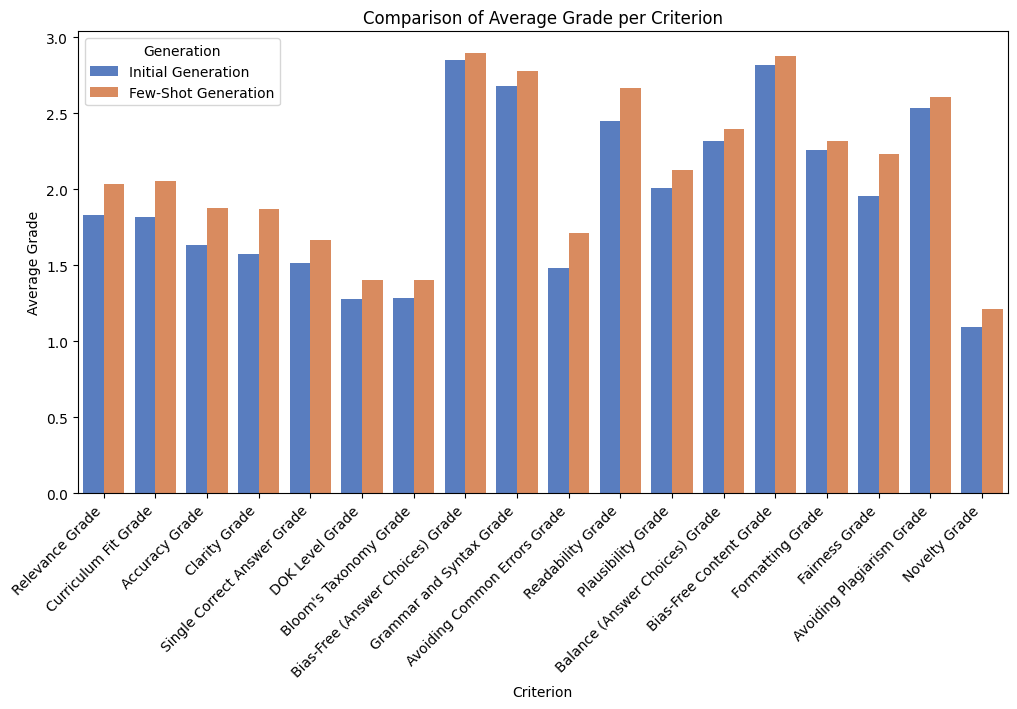

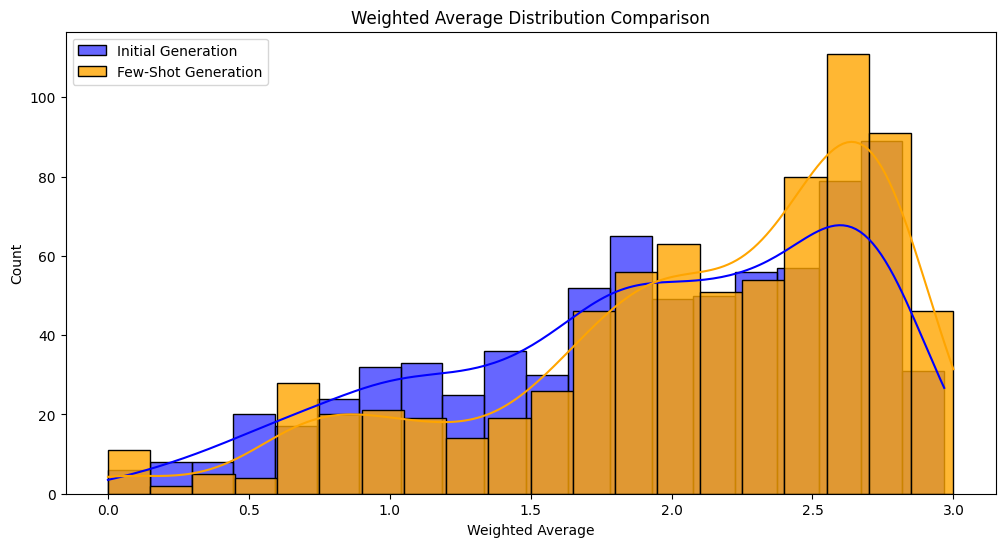

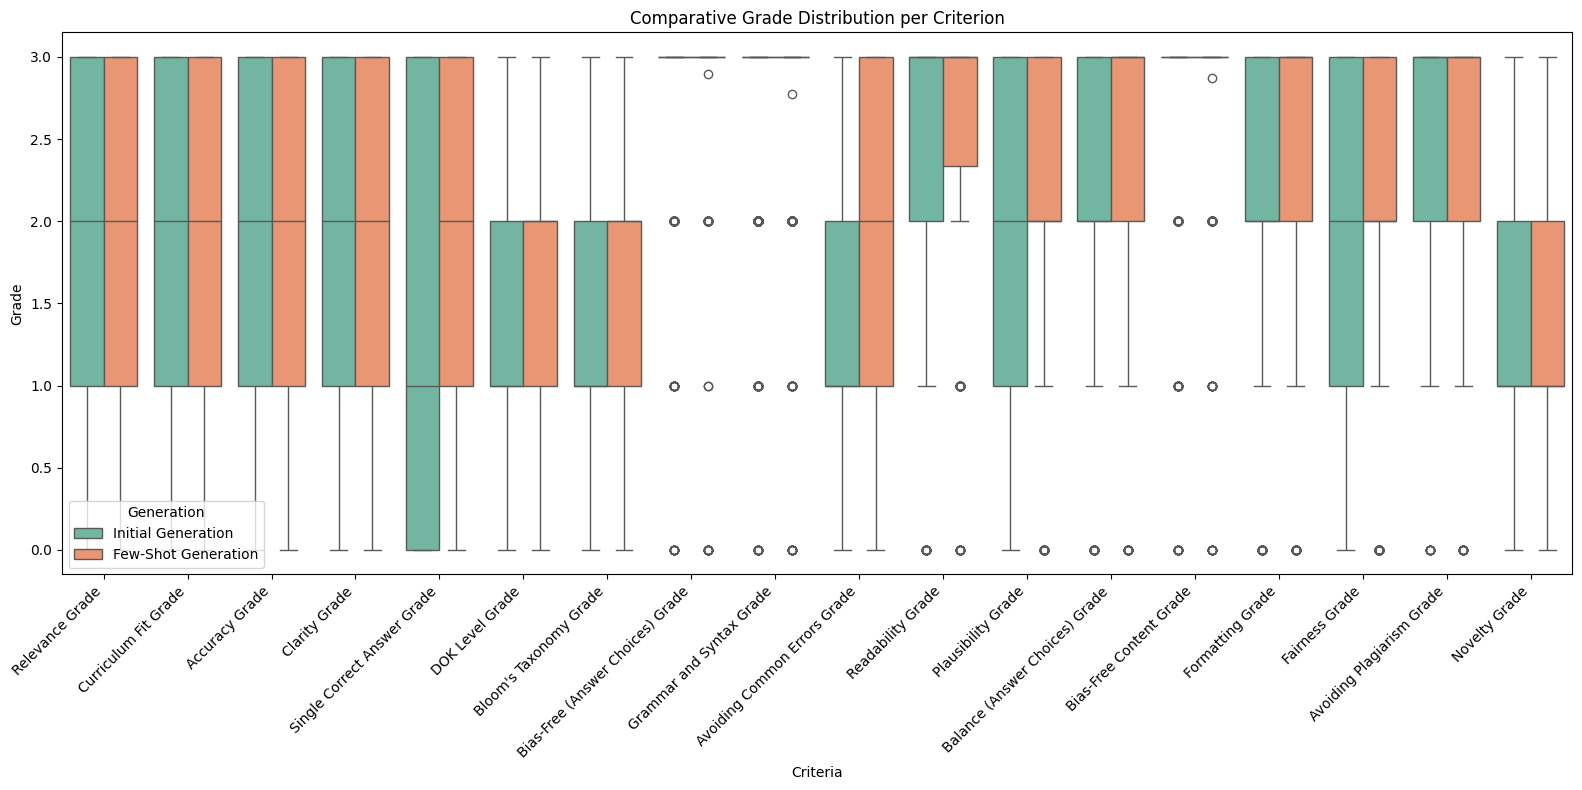

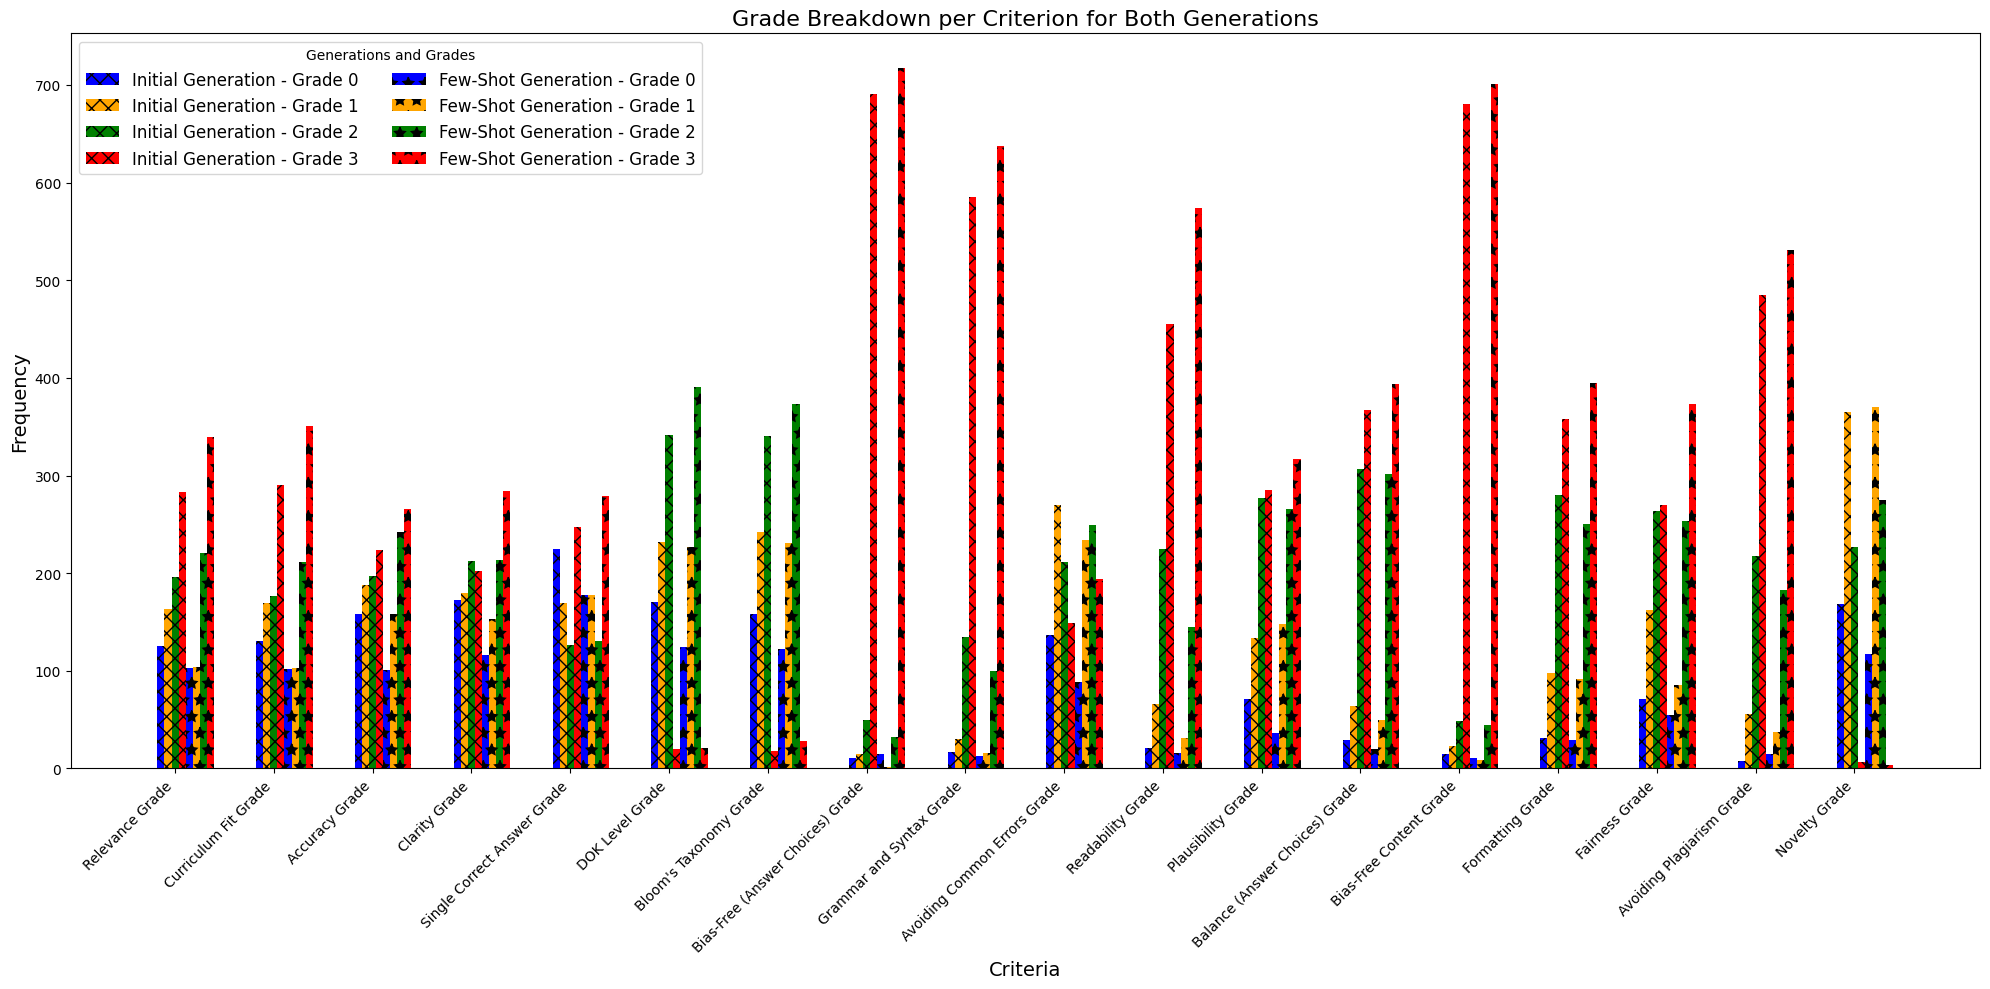

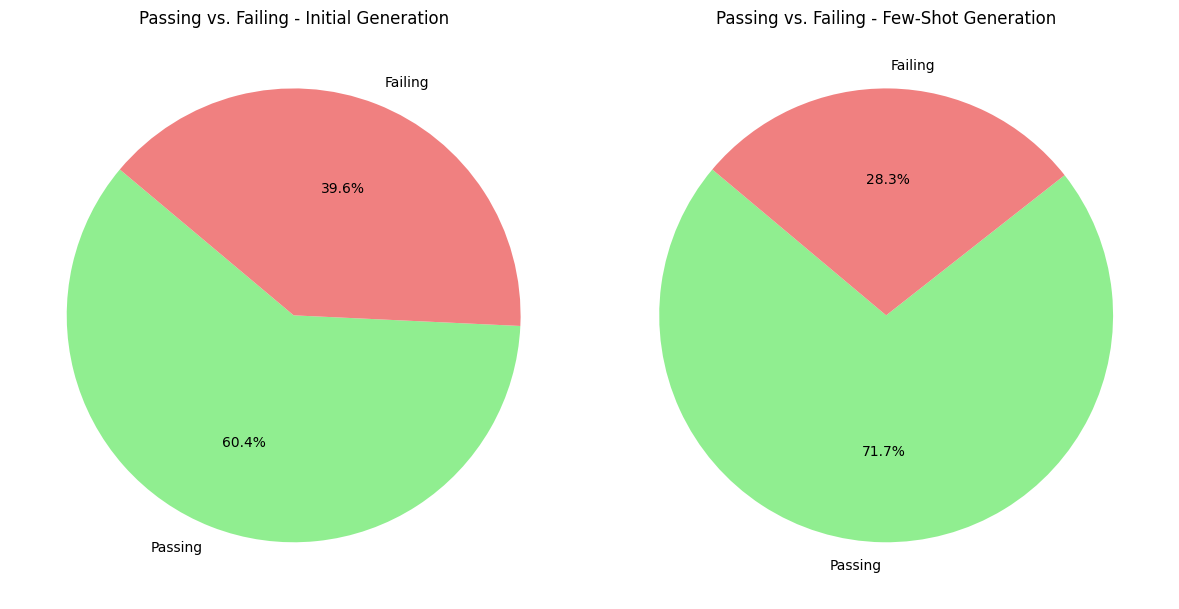

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load initial generation data
file_path_initial = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_FULL.xlsx'
df_initial = pd.read_excel(file_path_initial)

# Load few-shot generation data
file_path_few_shot = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_few_shot.xlsx'
df_few_shot = pd.read_excel(file_path_few_shot)

# Define weights for each criterion
weights = {
    'Relevance Grade': 5.0,
    'Curriculum Fit Grade': 5.0,
    'Accuracy Grade': 5.0,
    'Clarity Grade': 5.0,
    'Single Correct Answer Grade': 5.0,
    'DOK Level Grade': 3.5,
    "Bloom's Taxonomy Grade": 3.5,
    'Bias-Free (Answer Choices) Grade': 2.5,
    'Grammar and Syntax Grade': 3.5,
    'Avoiding Common Errors Grade': 2.5,
    'Readability Grade': 3.5,
    'Plausibility Grade': 3.0,
    'Balance (Answer Choices) Grade': 2.5,
    'Bias-Free Content Grade': 2.5,
    'Formatting Grade': 3.0,
    'Fairness Grade': 2.5,
    'Avoiding Plagiarism Grade': 2.0,
    'Novelty Grade': 2.0
}

# Normalize weights
weights = {k: v / sum(weights.values()) for k, v in weights.items()}

# Identify critical criteria
critical_criteria = ['Relevance Grade', 'Accuracy Grade', 'Single Correct Answer Grade', 'Clarity Grade', 'Curriculum Fit Grade']

def process_dataset(df):
    
    # Count imputed rows
    imputed_rows = df[list(weights.keys())].isna().any(axis=1).sum()
    
    # Impute missing scores with column average
    df[list(weights.keys())] = df[list(weights.keys())].apply(lambda x: x.fillna(x.mean()))
    
    # Compute weighted average
    df['Weighted Average'] = df[list(weights.keys())].mul(weights).sum(axis=1)
    
    # Determine failing due to critical criteria
    failed_critical = df[critical_criteria].lt(1).any(axis=1).sum()
    
    # Determine passing questions
    df['Passed'] = (~df[critical_criteria].lt(1).any(axis=1)) & (df['Weighted Average'] >= 1)
    
    # Compute average grade per criterion
    avg_grades = df[list(weights.keys())].mean()
    
    # return df, dropped_rows, imputed_rows, failed_critical, avg_grades
    return df, imputed_rows, failed_critical, avg_grades

# Process datasets
df_initial, imputed_rows_initial, failed_critical_initial, avg_grades_initial = process_dataset(df_initial)
df_few_shot, imputed_rows_few_shot, failed_critical_few_shot, avg_grades_few_shot = process_dataset(df_few_shot)

# Summary Table
summary_df = pd.DataFrame({
    "Dataset": ["Initial Generation", "Few-Shot Generation"],
    # "Dropped Rows": [dropped_rows_initial, dropped_rows_few_shot],
    "Imputed Rows": [imputed_rows_initial, imputed_rows_few_shot],
    "Final Rows": [len(df_initial), len(df_few_shot)],
    "Failed Due to Critical Criteria": [failed_critical_initial, failed_critical_few_shot],
    "Passing Questions": [df_initial['Passed'].sum(), df_few_shot['Passed'].sum()],
    "Failing Questions": [len(df_initial) - df_initial['Passed'].sum(),
                          len(df_few_shot) - df_few_shot['Passed'].sum()]
})

# Add average grade per criterion to summary
avg_grades_df = pd.DataFrame({
    "Criterion": list(weights.keys()),
    "Initial Generation": avg_grades_initial.values,
    "Few-Shot Generation": avg_grades_few_shot.values
})

print(summary_df)
print(avg_grades_df)


# Overlayed Bar Chart - Average Grade per Criterion
plt.figure(figsize=(12, 6))
average_grades_df = pd.DataFrame({
    'Criterion': list(weights.keys()),
    'Initial Generation': df_initial[list(weights.keys())].mean(),
    'Few-Shot Generation': df_few_shot[list(weights.keys())].mean()
})
sns.barplot(data=average_grades_df.melt(id_vars='Criterion', var_name='Generation', value_name='Average Grade'), 
            x='Criterion', y='Average Grade', hue='Generation', palette="muted")
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Average Grade per Criterion')
plt.show()

# Weighted Average Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_initial['Weighted Average'], kde=True, bins=20, color='blue', label='Initial Generation', alpha=0.6)
sns.histplot(df_few_shot['Weighted Average'], kde=True, bins=20, color='orange', label='Few-Shot Generation', alpha=0.8)
plt.title('Weighted Average Distribution Comparison')
plt.legend()
plt.show()

# Comparative Boxplot - Grade Distribution per Criterion
plt.figure(figsize=(16, 8))
df_initial_melted = df_initial[list(weights.keys())].reset_index().melt(id_vars=['index'], var_name='Criterion', value_name='Grade')
df_initial_melted['Generation'] = 'Initial Generation'

df_few_shot_melted = df_few_shot[list(weights.keys())].reset_index().melt(id_vars=['index'], var_name='Criterion', value_name='Grade')
df_few_shot_melted['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_melted, df_few_shot_melted], ignore_index=True)

sns.boxplot(data=df_combined, x='Criterion', y='Grade', hue='Generation', palette='Set2')
plt.title("Comparative Grade Distribution per Criterion")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Criteria")
plt.ylabel("Grade")
plt.legend(title="Generation", loc='lower left')
plt.tight_layout()
plt.show()

# Grade Breakdown per Criterion
# Compute grade counts for each criterion
df_initial_counts = df_initial[weights.keys()].apply(pd.Series.value_counts).fillna(0)
df_few_shot_counts = df_few_shot[weights.keys()].apply(pd.Series.value_counts).fillna(0)

# Reshape the data for visualization
df_initial_counts = df_initial_counts.stack().reset_index()
df_few_shot_counts = df_few_shot_counts.stack().reset_index()
df_initial_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_few_shot_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_initial_counts['Generation'] = 'Initial Generation'
df_few_shot_counts['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_counts, df_few_shot_counts])

# Assign hatching patterns for the two generations
hatch_patterns = {"Initial Generation": "xx", "Few-Shot Generation": "*"}
colors = {0: "blue", 1: "orange", 2: "green", 3: "red"}  # Assign colors for grades

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(20, 10))  # Increase figure size
bar_width = 0.15  # Reduce bar width to avoid overlap
spacing_between_groups = 1.5  # Increase spacing between different criteria
x = np.arange(len(weights.keys())) * (4 * bar_width + spacing_between_groups)  # Increase spacing between groups

# Store legend handles for all elements
legend_handles = []
legend_labels = []

# Plot bars for each grade
for i, generation in enumerate(["Initial Generation", "Few-Shot Generation"]):
    for j, grade in enumerate([0, 1, 2, 3]):
        subset = df_combined[(df_combined['Grade'] == grade) & (df_combined['Generation'] == generation)]
        bars = ax.bar(x + i * (4 * bar_width) + j * bar_width, subset['Frequency'], width=bar_width,
                      color=colors[grade], hatch=hatch_patterns[generation])
        
        # Store the first instance of each legend entry
        if (generation, grade) not in legend_labels:
            legend_handles.append(bars[0])
            legend_labels.append(f"{generation} - Grade {grade}")

ax.set_xticks(x + (2 * bar_width))
ax.set_xticklabels(weights.keys(), rotation=45, ha='right')
ax.set_title("Grade Breakdown per Criterion for Both Generations", fontsize=16)
ax.set_xlabel("Criteria", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Update legend to include both generations and all grades
ax.legend(legend_handles, legend_labels, title="Generations and Grades", bbox_to_anchor=(0, 1), loc='upper left', fontsize=12, ncol=2)

plt.tight_layout()
plt.show()

# Calculate passing and failing percentages
passing_initial = df_initial['Passed'].sum() / len(df_initial) * 100
failing_initial = 100 - passing_initial

passing_few_shot = df_few_shot['Passed'].sum() / len(df_few_shot) * 100
failing_few_shot = 100 - passing_few_shot

# Create a pie chart for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Initial Generation Pie Chart
axes[0].pie([passing_initial, failing_initial], labels=['Passing', 'Failing'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Passing vs. Failing - Initial Generation')

# Few-Shot Generation Pie Chart
axes[1].pie([passing_few_shot, failing_few_shot], labels=['Passing', 'Failing'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[1].set_title('Passing vs. Failing - Few-Shot Generation')

plt.tight_layout()
plt.show()



               Dataset  Missing Values Before Imputation  \
0   Initial Generation                                13   
1  Few-Shot Generation                                28   

   Missing Values After Imputation  Final Rows  \
0                                0         767   
1                                0         767   

   Failed Due to Critical Criteria  Passing Questions  Failing Questions  
0                              305                462                305  
1                              217                550                217  
                           Criterion  Initial Generation  Few-Shot Generation
0                    Relevance Grade            1.822686             2.035202
1               Curriculum Fit Grade            1.809648             2.054759
2                     Accuracy Grade            1.629726             1.876141
3                      Clarity Grade            1.572360             1.867014
4        Single Correct Answer Grade            1.512

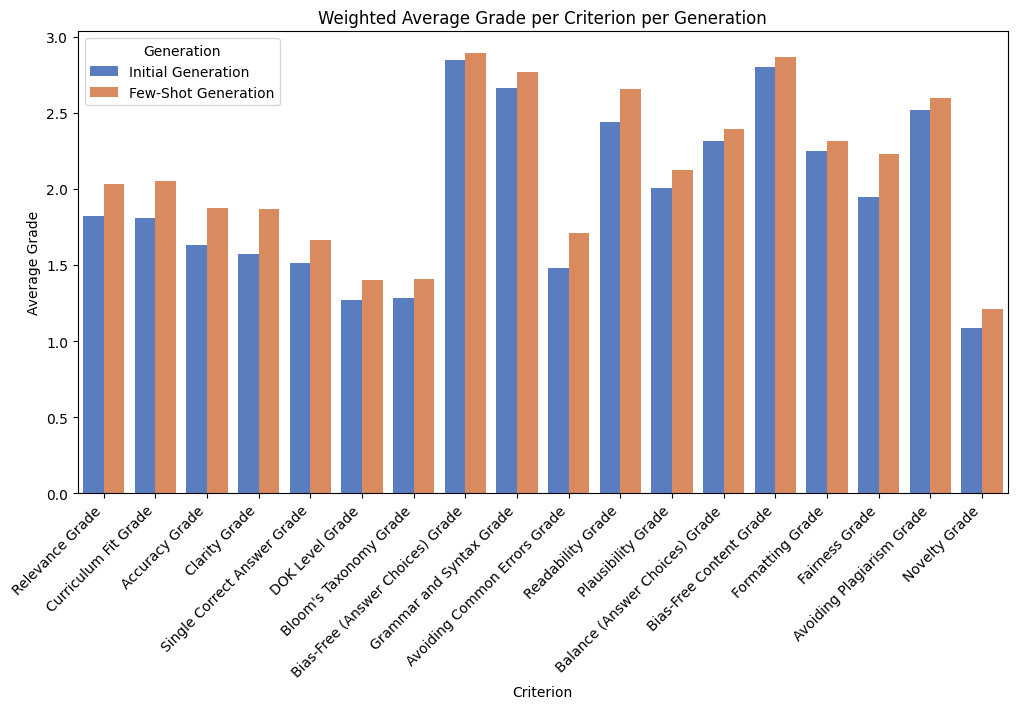

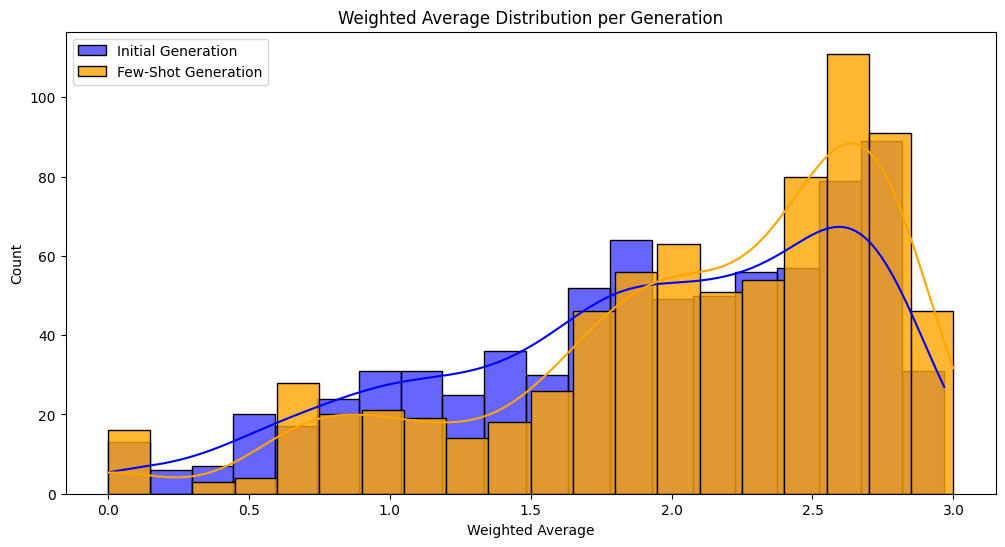

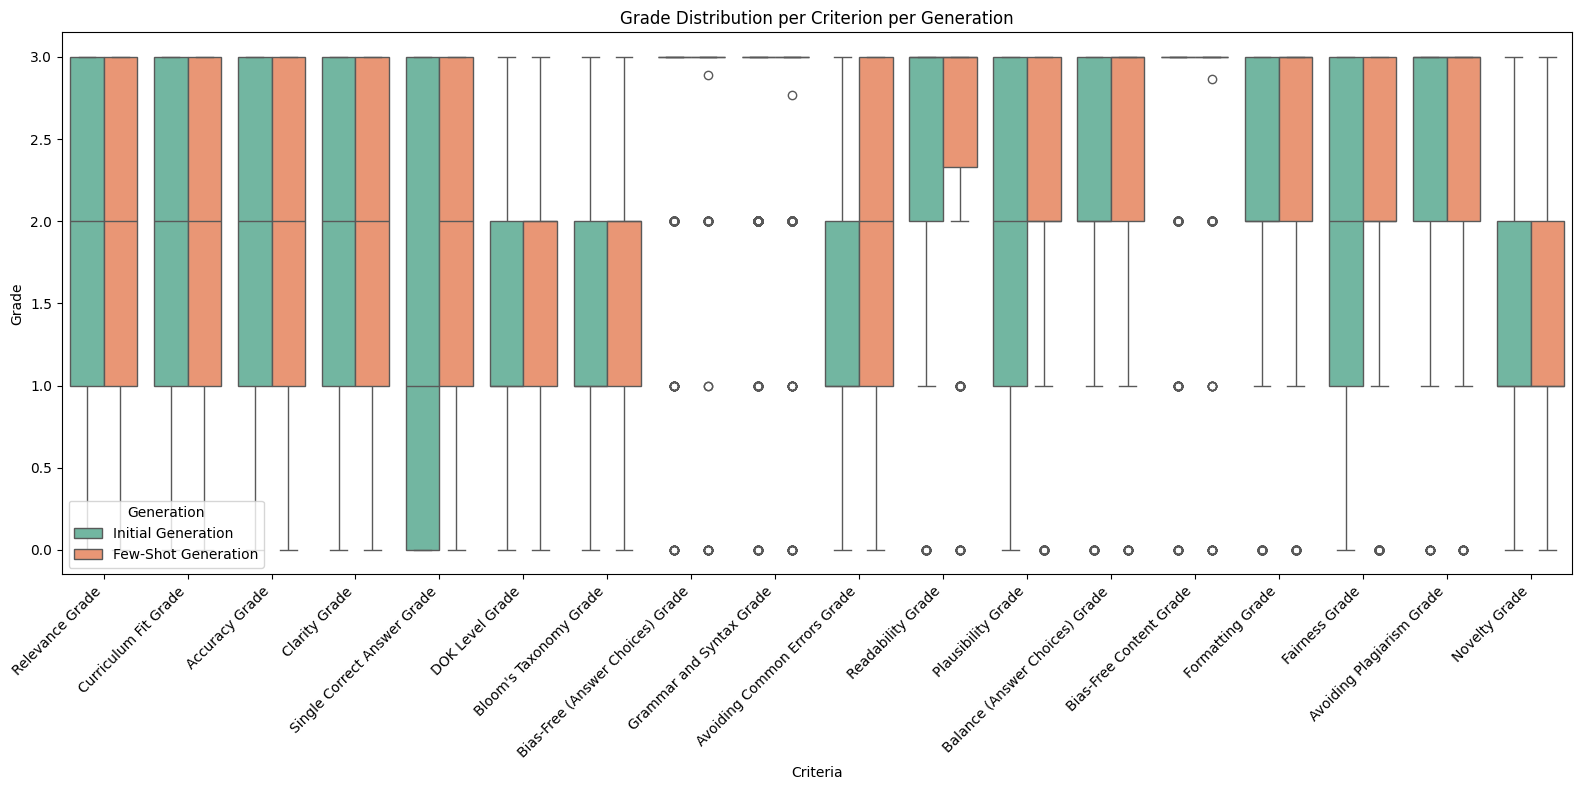

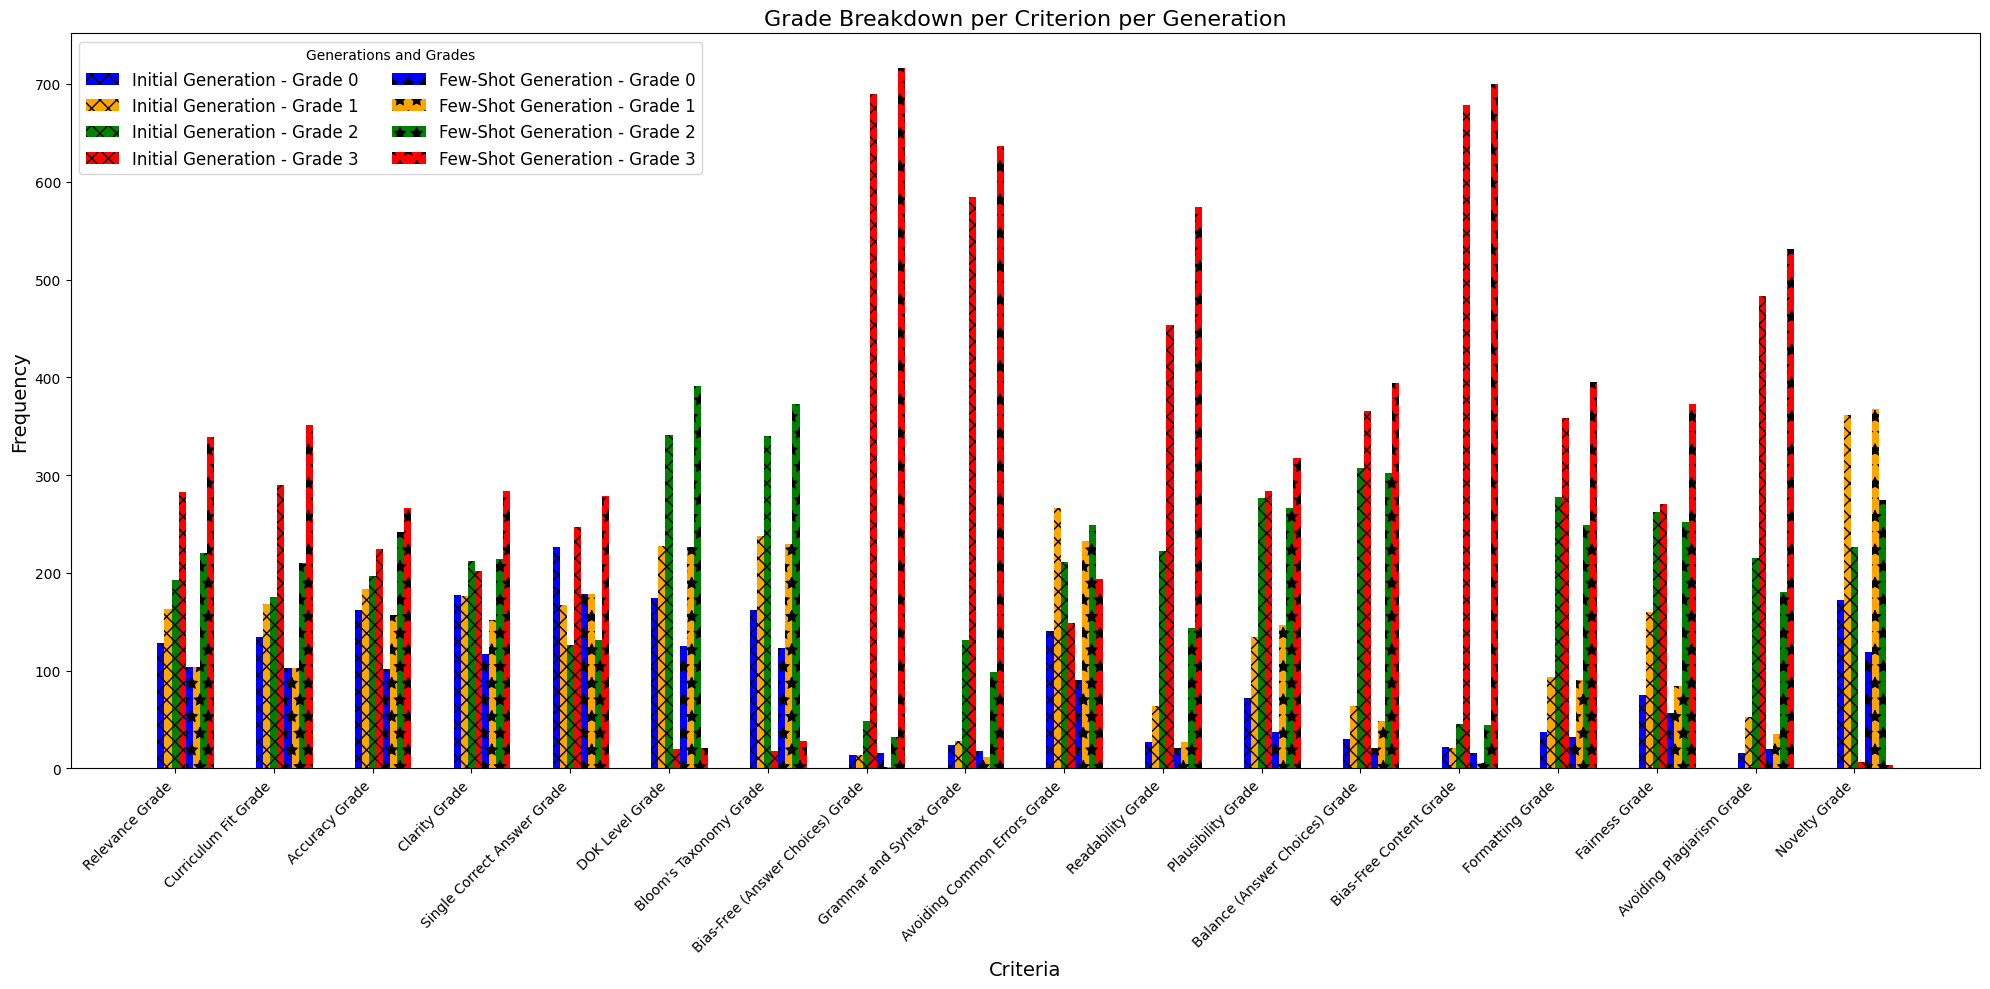

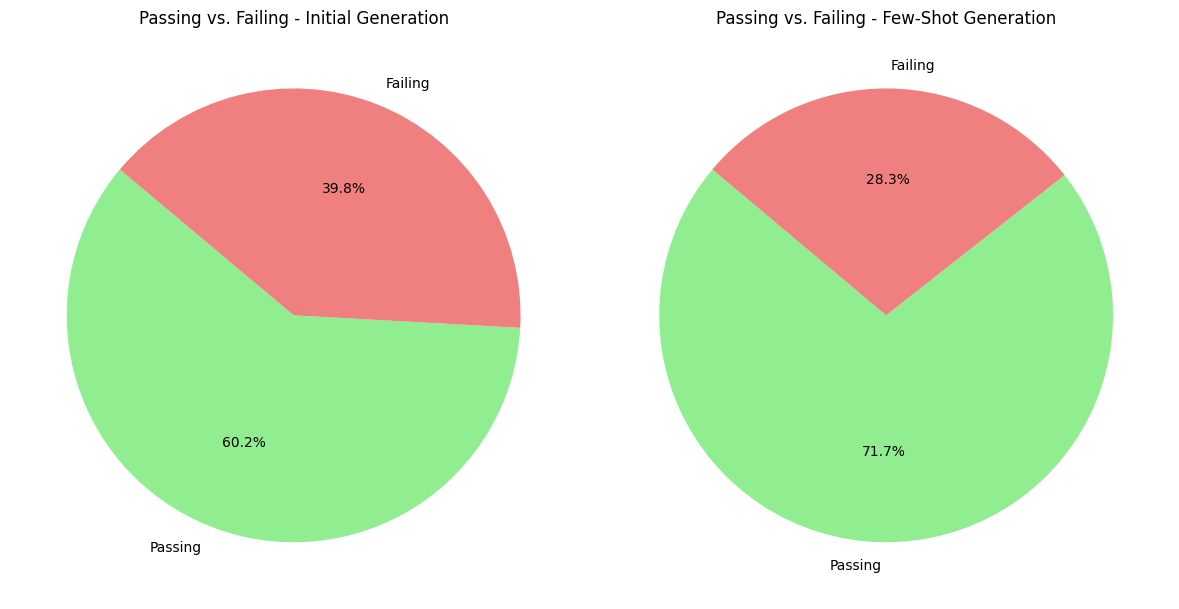

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load initial generation data
file_path_initial = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_FULL.xlsx'
df_initial = pd.read_excel(file_path_initial)

# Load few-shot generation data
file_path_few_shot = 'C:/Users/amjad/OneDrive/Documents/MSc AI/OCOM5300M Artificial Intelligence Project/Final Project/ScienceQA/Trial 1/Trial 1 - V2/Parsed_Evaluated_Questions_few_shot.xlsx'
df_few_shot = pd.read_excel(file_path_few_shot)

# Define weights for each criterion
weights = {
    'Relevance Grade': 5.0,
    'Curriculum Fit Grade': 5.0,
    'Accuracy Grade': 5.0,
    'Clarity Grade': 5.0,
    'Single Correct Answer Grade': 5.0,
    'DOK Level Grade': 3.5,
    "Bloom's Taxonomy Grade": 3.5,
    'Bias-Free (Answer Choices) Grade': 2.5,
    'Grammar and Syntax Grade': 3.5,
    'Avoiding Common Errors Grade': 2.5,
    'Readability Grade': 3.5,
    'Plausibility Grade': 3.0,
    'Balance (Answer Choices) Grade': 2.5,
    'Bias-Free Content Grade': 2.5,
    'Formatting Grade': 3.0,
    'Fairness Grade': 2.5,
    'Avoiding Plagiarism Grade': 2.0,
    'Novelty Grade': 2.0
}

# Normalize weights
weights = {k: v / sum(weights.values()) for k, v in weights.items()}

# Identify critical criteria
critical_criteria = ['Relevance Grade', 'Accuracy Grade', 'Single Correct Answer Grade', 'Clarity Grade', 'Curriculum Fit Grade']

def process_dataset(df):
    # Track missing values before imputation
    missing_before = df[list(weights.keys())].isna().sum().sum()
    
    # Identify missing Question Text or Answer Choices
    missing_question_mask = df[['Question', 'Choices']].isna().any(axis=1)

    # Impute scores with 0 if Question Text or Answer Choices are missing
    df.loc[missing_question_mask, list(weights.keys())] = 0

    # Standard imputation for remaining missing values (column mean)
    df[list(weights.keys())] = df[list(weights.keys())].apply(lambda x: x.fillna(x.mean()))

    # Track missing values after imputation
    missing_after = df[list(weights.keys())].isna().sum().sum()

    # Compute weighted average
    df['Weighted Average'] = df[list(weights.keys())].mul(weights).sum(axis=1)

    # Determine failing due to critical criteria
    failed_critical = df[critical_criteria].lt(1).any(axis=1).sum()

    # Determine passing questions
    df['Passed'] = (~df[critical_criteria].lt(1).any(axis=1)) & (df['Weighted Average'] >= 1)

    # Compute average grade per criterion
    avg_grades = df[list(weights.keys())].mean()

    return df, missing_before, missing_after, failed_critical, avg_grades

# Process datasets
df_initial, missing_before_initial, missing_after_initial, failed_critical_initial, avg_grades_initial = process_dataset(df_initial)
df_few_shot, missing_before_few_shot, missing_after_few_shot, failed_critical_few_shot, avg_grades_few_shot = process_dataset(df_few_shot)

# Summary Table
summary_df = pd.DataFrame({
    "Dataset": ["Initial Generation", "Few-Shot Generation"],
    "Missing Values Before Imputation": [missing_before_initial, missing_before_few_shot],
    "Missing Values After Imputation": [missing_after_initial, missing_after_few_shot],
    "Final Rows": [len(df_initial), len(df_few_shot)],
    "Failed Due to Critical Criteria": [failed_critical_initial, failed_critical_few_shot],
    "Passing Questions": [df_initial['Passed'].sum(), df_few_shot['Passed'].sum()],
    "Failing Questions": [len(df_initial) - df_initial['Passed'].sum(),
                          len(df_few_shot) - df_few_shot['Passed'].sum()]
})

# Add average grade per criterion to summary
avg_grades_df = pd.DataFrame({
    "Criterion": list(weights.keys()),
    "Initial Generation": avg_grades_initial.values,
    "Few-Shot Generation": avg_grades_few_shot.values
})

print(summary_df)
print(avg_grades_df)

# Overlayed Bar Chart - Average Grade per Criterion
plt.figure(figsize=(12, 6))
average_grades_df = pd.DataFrame({
    'Criterion': list(weights.keys()),
    'Initial Generation': df_initial[list(weights.keys())].mean(),
    'Few-Shot Generation': df_few_shot[list(weights.keys())].mean()
})
sns.barplot(data=average_grades_df.melt(id_vars='Criterion', var_name='Generation', value_name='Average Grade'), 
            x='Criterion', y='Average Grade', hue='Generation', palette="muted")
plt.xticks(rotation=45, ha='right')
plt.title('Weighted Average Grade per Criterion per Generation')
plt.show()

# Weighted Average Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_initial['Weighted Average'], kde=True, bins=20, color='blue', label='Initial Generation', alpha=0.6)
sns.histplot(df_few_shot['Weighted Average'], kde=True, bins=20, color='orange', label='Few-Shot Generation', alpha=0.8)
plt.title('Weighted Average Distribution per Generation')
plt.legend()
plt.show()

# Comparative Boxplot - Grade Distribution per Criterion
plt.figure(figsize=(16, 8))
df_initial_melted = df_initial[list(weights.keys())].reset_index().melt(id_vars=['index'], var_name='Criterion', value_name='Grade')
df_initial_melted['Generation'] = 'Initial Generation'

df_few_shot_melted = df_few_shot[list(weights.keys())].reset_index().melt(id_vars=['index'], var_name='Criterion', value_name='Grade')
df_few_shot_melted['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_melted, df_few_shot_melted], ignore_index=True)

sns.boxplot(data=df_combined, x='Criterion', y='Grade', hue='Generation', palette='Set2')
plt.title("Grade Distribution per Criterion per Generation")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Criteria")
plt.ylabel("Grade")
plt.legend(title="Generation", loc='lower left')
plt.tight_layout()
plt.show()

# Grade Breakdown per Criterion
# Compute grade counts for each criterion
df_initial_counts = df_initial[weights.keys()].apply(pd.Series.value_counts).fillna(0)
df_few_shot_counts = df_few_shot[weights.keys()].apply(pd.Series.value_counts).fillna(0)

# Reshape the data for visualization
df_initial_counts = df_initial_counts.stack().reset_index()
df_few_shot_counts = df_few_shot_counts.stack().reset_index()
df_initial_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_few_shot_counts.columns = ['Grade', 'Criterion', 'Frequency']
df_initial_counts['Generation'] = 'Initial Generation'
df_few_shot_counts['Generation'] = 'Few-Shot Generation'

df_combined = pd.concat([df_initial_counts, df_few_shot_counts])

# Assign hatching patterns for the two generations
hatch_patterns = {"Initial Generation": "xx", "Few-Shot Generation": "*"}
colors = {0: "blue", 1: "orange", 2: "green", 3: "red"}  # Assign colors for grades

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(20, 10))  # Increase figure size
bar_width = 0.15  # Reduce bar width to avoid overlap
spacing_between_groups = 1.5  # Increase spacing between different criteria
x = np.arange(len(weights.keys())) * (4 * bar_width + spacing_between_groups)  # Increase spacing between groups

# Store legend handles for all elements
legend_handles = []
legend_labels = []

# Plot bars for each grade
for i, generation in enumerate(["Initial Generation", "Few-Shot Generation"]):
    for j, grade in enumerate([0, 1, 2, 3]):
        subset = df_combined[(df_combined['Grade'] == grade) & (df_combined['Generation'] == generation)]
        bars = ax.bar(x + i * (4 * bar_width) + j * bar_width, subset['Frequency'], width=bar_width,
                      color=colors[grade], hatch=hatch_patterns[generation])
        
        # Store the first instance of each legend entry
        if (generation, grade) not in legend_labels:
            legend_handles.append(bars[0])
            legend_labels.append(f"{generation} - Grade {grade}")

ax.set_xticks(x + (2 * bar_width))
ax.set_xticklabels(weights.keys(), rotation=45, ha='right')
ax.set_title("Grade Breakdown per Criterion per Generation", fontsize=16)
ax.set_xlabel("Criteria", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Update legend to include both generations and all grades
ax.legend(legend_handles, legend_labels, title="Generations and Grades", bbox_to_anchor=(0, 1), loc='upper left', fontsize=12, ncol=2)

plt.tight_layout()
plt.show()

# Calculate passing and failing percentages
passing_initial = df_initial['Passed'].sum() / len(df_initial) * 100
failing_initial = 100 - passing_initial

passing_few_shot = df_few_shot['Passed'].sum() / len(df_few_shot) * 100
failing_few_shot = 100 - passing_few_shot

# Create a pie chart for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Initial Generation Pie Chart
axes[0].pie([passing_initial, failing_initial], labels=['Passing', 'Failing'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Passing vs. Failing - Initial Generation')

# Few-Shot Generation Pie Chart
axes[1].pie([passing_few_shot, failing_few_shot], labels=['Passing', 'Failing'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[1].set_title('Passing vs. Failing - Few-Shot Generation')

plt.tight_layout()
plt.show()


